# Facial Emotion Recognition - Preprocessing

## Import Libraries

In [2]:
### General imports ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### CNN models ###
from keras.utils import to_categorical

2024-06-18 13:04:11.494613: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# import os

# cwd = os.getcwd()  # Get the current working directory (cwd)
# files = os.listdir(cwd)  # Get all the files in that directory
# print("Files in %r: %s" % (cwd, files))

Files in '/Users/ashrafmahmoud/Documents/ITI/9 Months/Core courses/Computer Vision/Projects/Emotion_Recognition/Notebooks': ['Prediction.ipynb', 'Preprocessing.ipynb', '.DS_Store', 'XceptionModel.ipynb']


## Import DataSet

In [6]:
# Suppress the SettingWithCopyWarning
pd.options.mode.chained_assignment = None

path = "/Users/ashrafmahmoud/Documents/ITI/9 Months/Core courses/Computer Vision/Projects/Emotion_Recognition_XCeption/challenges-in-representation-learning-facial-expression-recognition-challenge/"

# dataset
dataset = pd.read_csv(path + "fer2013/fer2013.csv")

In [7]:
dataset.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [8]:
dataset["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [9]:
#Obtaining train data where usage is "Training"
train = dataset[dataset["Usage"] == "Training"]

#Obtaining test data where usage is "PublicTest"
test = dataset[dataset["Usage"] == "PublicTest"]

In [10]:
#Converting " " separated pixel values to list
train['pixels'] = train['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))
test['pixels'] = test['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))
dataset['pixels'] = dataset['pixels'].apply(lambda image_px : np.fromstring(image_px, sep = ' '))

In [11]:
print(dataset.shape, train.shape, test.shape)

(35887, 3) (28709, 3) (3589, 3)


Text(0.5, 1.0, 'Histogram of Emotion')

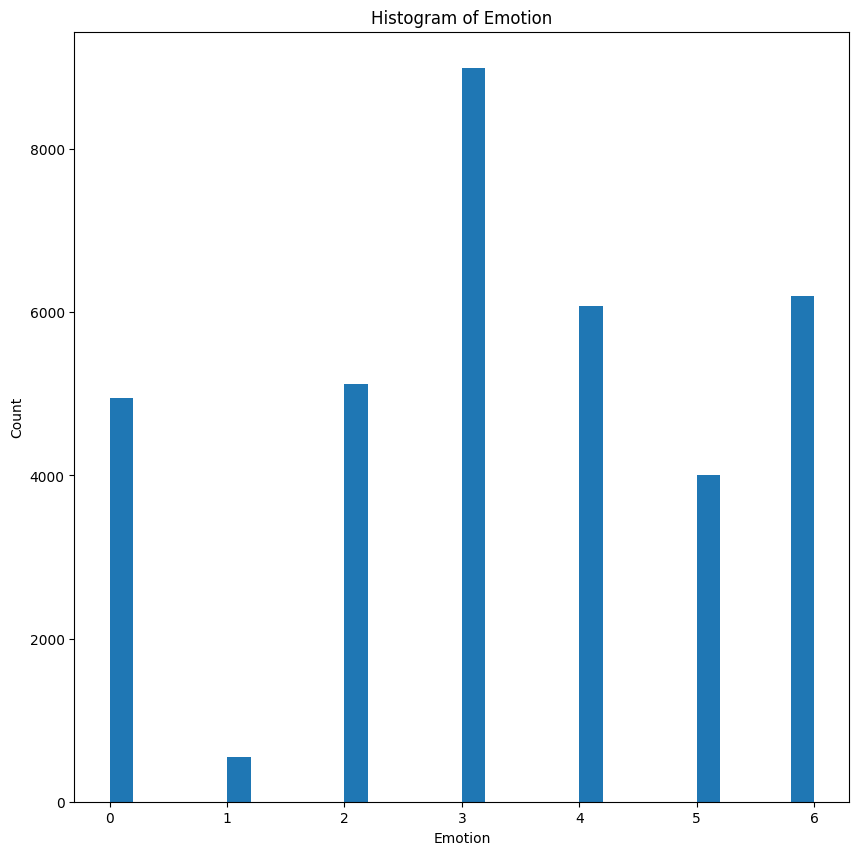

In [12]:
plt.figure(figsize=(10,10))
plt.hist(dataset['emotion'], bins=30)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Histogram of Emotion')

In [13]:
train

,emotion,pixels,Usage
0,0,"[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63....",Training
1,0,"[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111...",Training
2,2,"[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161...",Training
3,4,"[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20....",Training
4,6,"[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Training
...,...,...,...
28704,2,"[84.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85....",Training
28705,0,"[114.0, 112.0, 113.0, 113.0, 111.0, 111.0, 112...",Training
28706,4,"[74.0, 81.0, 87.0, 89.0, 95.0, 100.0, 98.0, 93...",Training
28707,0,"[222.0, 227.0, 203.0, 90.0, 86.0, 90.0, 84.0, ...",Training


In [14]:
test.head()

,emotion,pixels,Usage
28709,0,"[254.0, 254.0, 254.0, 254.0, 254.0, 249.0, 255...",PublicTest
28710,1,"[156.0, 184.0, 198.0, 202.0, 204.0, 207.0, 210...",PublicTest
28711,4,"[69.0, 118.0, 61.0, 60.0, 96.0, 121.0, 103.0, ...",PublicTest
28712,6,"[205.0, 203.0, 236.0, 157.0, 83.0, 158.0, 120....",PublicTest
28713,3,"[87.0, 79.0, 74.0, 66.0, 74.0, 96.0, 77.0, 80....",PublicTest


## Split the data

In [15]:
shape_x = 48
shape_y = 48

In [16]:
X_train = train.iloc[:, 1].values
y_train = train.iloc[:, 0].values

X_test = test.iloc[:, 1].values
y_test = test.iloc[:, 0].values

X = dataset.iloc[:,1].values
y = dataset.iloc[:,0].values

In [17]:
#np.vstack stack arrays in sequence vertically (picking element row wise)
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)
X = np.vstack(X)

In [18]:
#Reshape X_train, y_train,X_test,y_test in desired formats
X_train = np.reshape(X_train, (X_train.shape[0],48,48,1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

X_test = np.reshape(X_test, (X_test.shape[0],48,48,1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

X = np.reshape(X, (X.shape[0],48,48,1))
y = np.reshape(y, (y.shape[0],1))

print("Shape of X_train and y_train is " + str(X_train.shape) +" and " + str(y_train.shape) +" respectively.")
print("Shape of X_test and y_test is " + str(X_test.shape) +" and " + str(y_test.shape) +" respectively.")

Shape of X_train and y_train is (28709, 48, 48, 1) and (28709, 1) respectively.
Shape of X_test and y_test is (3589, 48, 48, 1) and (3589, 1) respectively.


In [19]:
print("X_train type: " + str(X_train.dtype) + " And y_test type: " + str(y_test.dtype))

X_train type: float64 And y_test type: int64


In [20]:
# Change to float datatype
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X = X.astype('float32')

# Scale the data to lie between 0 to 1
X_train = X_train / 255
X_test /= 255
X /= 255

# # Change the labels from integer to categorical data
# num_classes = 7 
# y_train = to_categorical(y_train, num_classes=num_classes)
# y_test = to_categorical(y_test, num_classes=num_classes)
# y = to_categorical(y, num_classes=num_classes)

In [21]:
y_train

array([[0],
       [0],
       [2],
       ...,
       [4],
       [0],
       [4]])

## Number of Classes

In [22]:
classes = np.unique(y_train)
num_classes = len(classes)
print('Total number of classes : ', num_classes)
print('Output classes : ', classes)

Total number of classes :  7
Output classes :  [0 1 2 3 4 5 6]


In [23]:
X_train[0].shape

(48, 48, 1)

In [24]:
# Find the shape of input images and create the variable input_shape
num_rows, num_cols, num_dims = X_train.shape[1:]
input_shape = (num_rows, num_cols, num_dims)
print(input_shape)

(48, 48, 1)


In [25]:
#Defining labels 
def get_label(argument):
    labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad' , 5:'Surprise', 6:'Neutral'}
    return(labels.get(argument, "Invalid emotion"))

Text(0.5, 1.0, 'Ground Truth : Happy')

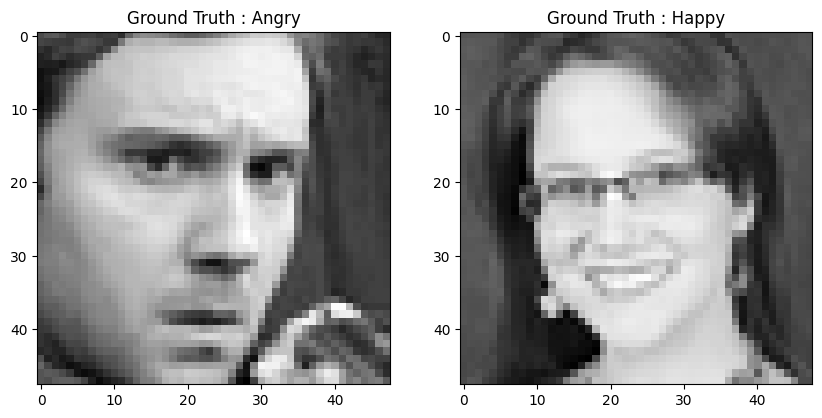

In [26]:
plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(np.squeeze(X_train[0,:,:], axis = 2), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_train[0]))))

# Display the 8th image in training data
plt.subplot(122)
plt.imshow(np.squeeze(X_train[7,:,:], axis = 2), cmap='gray')
plt.title("Ground Truth : {}".format(get_label(int(y_train[7]))))

## Save the dataframes

In [27]:
folder_path = path + "Preprocessing_data/"

In [28]:
np.save(folder_path + 'X_train', X_train)
np.save(folder_path + 'X_test', X_test)
np.save(folder_path + 'X', X)
np.save(folder_path + 'y_train', y_train)
np.save(folder_path + 'y_test', y_test)
np.save(folder_path + 'y', y)